## Pokemon Party II!!  

file path : ~\KUBIG\KUBIG_2019_Summer\Python\data\pokemon.csv   
kaggle : https://www.kaggle.com/rounakbanik/pokemon  
오늘은 pokemon data로 Classification을 해봅시다.  
- target variable은 is_legendary입니다.

* Import packages.
    - numpy, pandas, matplotlib.pyplot, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Read the file into a DataFrame. : pokemon

In [2]:
import os
path = os.getcwd()
pokemon = pd.read_csv(path + '\data\pokemon.csv')

### 1. Check basic information of pokemon data

In [3]:
# display the first and last row of pokemon
display(pokemon.iloc[[0,-1], :])

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [4]:
# print the shape of pokemon
print(pokemon.shape)

# print the columns of pokemon
print(pokemon.columns)

(801, 41)
Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


In [5]:
# print the info of pokemon
print(pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [6]:
# print describe of pokemon
print(pokemon.describe())

       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000    

-----------------------------------------------------------
### 2. Regular expression

* Import proper package to use regualr expression.

In [7]:
import re

In [8]:
# Make empty list : new_japanes_name
new_japanese_name = []

# Make for loop to solve the problem
for jap_name in pokemon.japanese_name:
    english = re.compile('[A-Za-z]+')
    new_japanese_name.append(english.findall(jap_name)[0])

# print the first 5 entries of new_japanese_name
print(new_japanese_name[:5])

['Fushigidane', 'Fushigisou', 'Fushigibana', 'Hitokage', 'Lizardo']


* Change japanese_name column!

In [9]:
pokemon['japanese_name'] = new_japanese_name

# print the head of the pokemon.japanese_name
print(pokemon.japanese_name.head())

0    Fushigidane
1     Fushigisou
2    Fushigibana
3       Hitokage
4        Lizardo
Name: japanese_name, dtype: object


* Set Index by using name, japanese_name in order.

In [10]:
pokemon.set_index(['name', 'japanese_name'], inplace=True)

# display the tail of the pokemon
display(pokemon.tail())

,,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
name,japanese_name,,,,,,,,,,,,,,,,,,,,,
Celesteela,Tekkaguya,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
Kartana,Kamiturugi,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
Guzzlord,Akuziking,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
Necrozma,Necrozma,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
Magearna,Magearna,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


----------------------------
### 3. Preprocessing

* drop abilities, classfication column.

In [11]:
X = pokemon.drop(['classfication', 'abilities'], axis=1)

# print column names of X
print(X.columns)

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')


* check the number of NaNs of each column

In [12]:
pokemon.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0
dtype: int64

* change type2s NaN to 'none'

In [13]:
X.loc[pokemon.type2.isna(), 'type2'] = 'none'

# check the number of type2 NaNs
sum(X.type2.isna())

0

* Make Dummy Variables of type1, type2
    - pd.get_dummies

In [14]:
type1_dummy = pd.get_dummies(pokemon.type1, prefix='type1', drop_first=True)
type2_dummy = pd.get_dummies(pokemon.type2, prefix='type2', drop_first=True)

# concatenate
X = pd.concat([X, type1_dummy, type2_dummy], axis=1)

# drop type1, type2 on X
X.drop(['type1', 'type2'], axis=1, inplace=True)

# print columns name
print(X.columns)

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'percentage_male',
       'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'weight_kg',
       'generation', 'is_legendary', 'type1_dark', 'type1_dragon',
       'type1_electric', 'type1_fairy', 'type1_fighting', 'type1_fire',
       'type1_flying', 'type1_ghost', 'type1_grass', 'type1_ground',
       'type1_ice', 'type1_normal', 'type1_poison', 'type1_psychic',
       'type1_rock', 'type1_steel', 'type1_water', 'type2_dark',
       'type2_dragon', 'type2_electric', 'type2_fairy', 'type2_fighting',
       

* check the total number of NaN of height_m, weight_kg, percentage_male

In [15]:
sum(pokemon[['height_m', 'weight_kg', 'percentage_male']].isna().sum(axis=1) > 0)

117

* drop all missing values of height_m, weight_kg

In [16]:
X.dropna(subset = ['height_m', 'weight_kg'], axis=0, inplace=True)

# print shape of X
print(X.shape)

(781, 69)


* 아래의 행 때문에 SimpleImputer가 에러납니다.

In [17]:
X.drop(X.capture_rate[X.capture_rate == '30 (Meteorite)255 (Core)'].index[0], inplace=True)

* import percentage_male with mean

In [18]:
# import SimpleImputer from sklearn.impute
from sklearn.impute import SimpleImputer

# make imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# fit imputer
imputer.fit(X)

# print imputer.transform
print(imputer.transform(X))

# change X DataFrame with Imputing results
X = pd.DataFrame(imputer.transform(X), columns=X.columns, index=X.index)

[[1.   1.   1.   ... 0.   0.   0.  ]
 [1.   1.   1.   ... 0.   0.   0.  ]
 [1.   1.   1.   ... 0.   0.   0.  ]
 ...
 [2.   0.5  2.   ... 0.   0.   0.  ]
 [2.   2.   1.   ... 0.   0.   0.  ]
 [0.25 0.5  0.   ... 0.   1.   0.  ]]


* check NaNs

In [19]:
X.isna().sum()[X.isna().sum() > 0]

Series([], dtype: int64)

* split target variable and explanatory variable

In [20]:
y = X.is_legendary
X = X.drop('is_legendary', axis=1)

# print shapes of X and y
print(X.shape, y.shape)

(780, 68) (780,)


### 4. Classification!!
models of classification
- KNN
- Logistic Regression
- Decision Tree
- Naive Basian
- SVM
- etc...

#### 1. K-Nearest Neighborhood
KNN은 Instance-based Classifier로 model-based Classifier에 비해서 decision boundary의 형태가 자유롭다.  
KNN과 같은 lazy learning은 학습시간은 짧으나 예측시간이 오래걸린다.

* import KNeighborsClassifier from sklearn.neighbors
* import train_test_split from sklearn.model_selection
* impport classification_report, confusion_matrix from sklearn.metrics

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

* split train and test data
    - test data : 30%
    - random state : 1234

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# print head of y_test
print(y_test.head())

name        japanese_name
Accelgor    Agilder          0.0
Talonflame  Fiarrow          0.0
Ledyba      Rediba           0.0
Komala      Nekkoara         0.0
Clawitzer   Bloster          0.0
Name: is_legendary, dtype: float64


In [25]:
# print shapes of train data
print(X_train.shape, y_train.shape)

(546, 68) (546,)


* 이제부터 KNN을 해봅시다

In [40]:
# make 3-NN model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model with train data
knn.fit(X_train, y_train)

# predict the model with X_test : y_pred
y_pred = knn.predict(X_test)

# predict the accuracy
print(knn.score(X_test, y_test))

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

0.9871794871794872
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       212
         1.0       0.91      0.95      0.93        22

    accuracy                           0.99       234
   macro avg       0.95      0.97      0.96       234
weighted avg       0.99      0.99      0.99       234

[[210   2]
 [  1  21]]


* make ROC curve

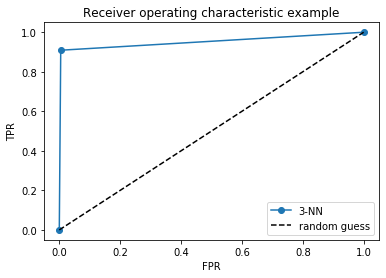

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, 'o-', label="3-NN")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.show()

* find best 'k'

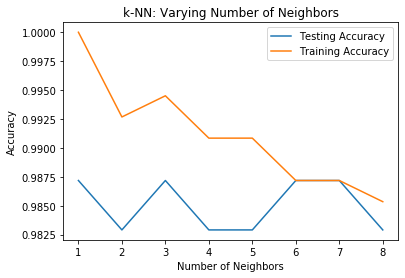

In [42]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

* K-NN with n-fold Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

# Create a 3-NN objects
knn = KNeighborsClassifier(3)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(knn, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.97452229 0.98717949 0.99358974 0.96153846 0.97419355]
Average 5-Fold CV Score: 0.978204706737684


* find best k with CV

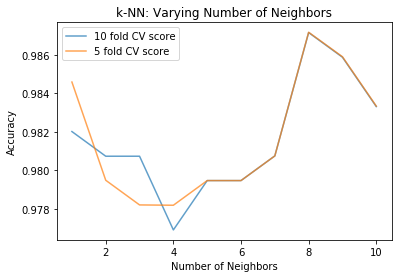

In [53]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
avg_10cvscores = np.empty(len(neighbors))
avg_5cvscores = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Compute 10-fold cross-validation scores: cv_scores
    cv_10scores = cross_val_score(knn, X, y, cv=10)
        
    # Compute average of the cv scores
    avg_10cvscores[i] = np.mean(cv_10scores)
    
    # Compute 5-fold cross-validation scores: cv_scores
    cv_5scores = cross_val_score(knn, X, y, cv=5)
        
    # Compute average of the cv scores
    avg_5cvscores[i] = np.mean(cv_5scores)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, avg_10cvscores, label = '10 fold CV score', alpha=0.7)
plt.plot(neighbors, avg_5cvscores, label = '5 fold CV score', alpha=0.7)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 2. Logistic Regression

* import LogisticRegression from sklearn.linear_model

In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
# make logistic regression model with penalty='l1'
logreg = LogisticRegression(penalty='l1')

# fit the model with train data
logreg.fit(X_train, y_train)

# predict the model with X_test : y_pred
y_pred = logreg.predict(X_test)

# predict the accuracy
print(logreg.score(X_test, y_test))

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

0.9700854700854701
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       212
         1.0       0.94      0.73      0.82        22

    accuracy                           0.97       234
   macro avg       0.96      0.86      0.90       234
weighted avg       0.97      0.97      0.97       234

[[211   1]
 [  6  16]]


* make ROC curve

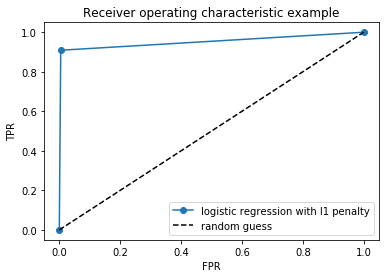

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, 'o-', label="logistic regression with l1 penalty")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.show()

In [64]:
# make logistic regression model with penalty='l2'
logreg = LogisticRegression(penalty='l2')

# fit the model with train data
logreg.fit(X_train, y_train)

# predict the model with X_test : y_pred
y_pred = logreg.predict(X_test)

# predict the accuracy
print(logreg.score(X_test, y_test))

# print classification report
print(classification_report(y_test, y_pred))

# print confusion matrix
print(confusion_matrix(y_test, y_pred))

0.9871794871794872
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       212
         1.0       0.95      0.91      0.93        22

    accuracy                           0.99       234
   macro avg       0.97      0.95      0.96       234
weighted avg       0.99      0.99      0.99       234

[[211   1]
 [  2  20]]


c:\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* make ROC curve

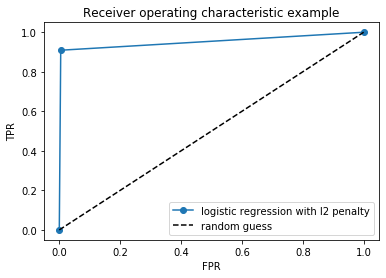

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, 'o-', label="logistic regression with l2 penalty")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.show()

고생하셨습니다.

#### END